In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys

sys.path.append('/Users/gsinyakov/ts_course_summer/')

In [18]:
import model
import load_dataset
from plotting import plot_multiple_ts

#### Возьмем временной ряд

In [19]:
dataset = load_dataset.Dataset('../data/dataset/')

In [20]:
ts = dataset['hour_376.csv']

In [21]:
ts.head()

2019-05-19T03:00:00
2019-05-19 04:00:00     1.0
2019-05-19 05:00:00     6.0
2019-05-19 06:00:00    11.0
2019-05-19 07:00:00    16.0
2019-05-19 08:00:00    26.0
Name: 2.0, dtype: float64

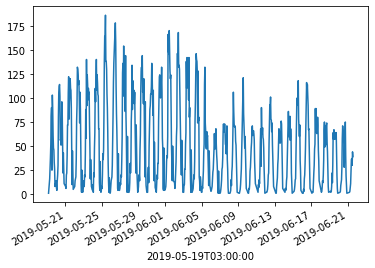

In [22]:
ts.plot()

####  Зададим гранулярность

In [23]:
# гранулярность, она же частота временного ряда, задается в согласии с форматов iso6801
# https://en.wikipedia.org/wiki/ISO_8601
granularity = 'PT1H'

In [24]:
# для ее перевода в datetime интервал мы будем использовать функцию parse_duration сторонней библиотеки isodate
!pip install isodate

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import isodate
isodate.parse_duration(granularity)

datetime.timedelta(seconds=3600)

#### Зададим ширину окна

In [26]:
num_lags = 24

#### Зададим сторонние признаки

In [27]:
def get_hour(timestamp):
    return timestamp.hour

def get_monthdate(timestamp):
    return timestamp.day

def get_month(timestamp):
    return timestamp.month

def get_dayofweek(timestamp):
    return timestamp.dayofweek

def get_year(timestamp):
    return timestamp.year


external_features = {
    'hour': get_hour,
    'monthdate': get_monthdate,
    'month': get_month,
    'dayofweek': get_dayofweek,
    'year': get_year
}

#### Зададим модель

In [28]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression

#### Создадим экзэмпляр класса TimeSeriesPredictor

In [30]:
predictor = model.TimeSeriesPredictor(
    granularity=granularity,
    num_ma_lags=0,
    num_lags=num_lags,
    Model=Model,
    mappers=external_features
)

#### Посмотрим, как работает метод transform_into_matrix

In [31]:
lags_matrix = predictor.transform_into_matrix(ts)

In [32]:
lags_matrix

,lag_24,lag_23,lag_22,lag_21,lag_20,lag_19,lag_18,lag_17,lag_16,lag_15,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0
2019-05-19T03:00:00,,,,,,,,,,,,,,,,,,,,,
2019-05-20 06:00:00,1.0,6.0,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,...,33.0,26.0,8.0,14.0,6.0,4.0,14.0,20.0,30.0,80.0
2019-05-20 07:00:00,6.0,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,...,26.0,8.0,14.0,6.0,4.0,14.0,20.0,30.0,80.0,106.0
2019-05-20 08:00:00,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,...,8.0,14.0,6.0,4.0,14.0,20.0,30.0,80.0,106.0,112.0
2019-05-20 09:00:00,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,61.0,...,14.0,6.0,4.0,14.0,20.0,30.0,80.0,106.0,112.0,114.0
2019-05-20 10:00:00,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,61.0,48.0,...,6.0,4.0,14.0,20.0,30.0,80.0,106.0,112.0,114.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-21 10:00:00,2.0,3.0,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,...,40.0,19.0,9.0,1.0,2.0,3.0,7.0,11.0,22.0,36.0
2019-06-21 11:00:00,3.0,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,52.0,...,19.0,9.0,1.0,2.0,3.0,7.0,11.0,22.0,36.0,37.0
2019-06-21 12:00:00,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,52.0,28.0,...,9.0,1.0,2.0,3.0,7.0,11.0,22.0,36.0,37.0,30.0


#### Добавим сторонние признаки

In [33]:
feature_matrix = predictor.enrich(lags_matrix)

In [34]:
feature_matrix

,lag_24,lag_23,lag_22,lag_21,lag_20,lag_19,lag_18,lag_17,lag_16,lag_15,...,lag_4,lag_3,lag_2,lag_1,lag_0,hour,monthdate,month,dayofweek,year
2019-05-19T03:00:00,,,,,,,,,,,,,,,,,,,,,
2019-05-20 06:00:00,1.0,6.0,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,...,4.0,14.0,20.0,30.0,80.0,6,20,5,0,2019
2019-05-20 07:00:00,6.0,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,...,14.0,20.0,30.0,80.0,106.0,7,20,5,0,2019
2019-05-20 08:00:00,11.0,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,...,20.0,30.0,80.0,106.0,112.0,8,20,5,0,2019
2019-05-20 09:00:00,16.0,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,61.0,...,30.0,80.0,106.0,112.0,114.0,9,20,5,0,2019
2019-05-20 10:00:00,26.0,38.0,52.0,81.0,90.0,25.0,103.0,87.0,61.0,48.0,...,80.0,106.0,112.0,114.0,102.0,10,20,5,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-21 10:00:00,2.0,3.0,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,...,3.0,7.0,11.0,22.0,36.0,10,21,6,4,2019
2019-06-21 11:00:00,3.0,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,52.0,...,7.0,11.0,22.0,36.0,37.0,11,21,6,4,2019
2019-06-21 12:00:00,9.0,12.0,15.0,28.0,58.0,71.0,65.0,65.0,52.0,28.0,...,11.0,22.0,36.0,37.0,30.0,12,21,6,4,2019


#### Обучим модель

In [35]:
predictor.fit(ts)

#### Предскажем следующие несколько точек

In [36]:
prediction = predictor.predict_next(ts, n_steps=24)

In [37]:
prediction

2019-06-21 15:00:00    28.486467
2019-06-21 16:00:00    49.802910
2019-06-21 17:00:00    53.353370
2019-06-21 18:00:00    57.173120
2019-06-21 19:00:00    58.379030
2019-06-21 20:00:00    48.242931
2019-06-21 21:00:00    36.898457
2019-06-21 22:00:00    51.195008
2019-06-21 23:00:00    57.234110
2019-06-22 00:00:00    69.344327
2019-06-22 01:00:00    46.702612
2019-06-22 02:00:00    34.513853
2019-06-22 03:00:00    25.736846
2019-06-22 04:00:00    18.916658
2019-06-22 05:00:00    14.033771
2019-06-22 06:00:00    16.607841
2019-06-22 07:00:00    18.080573
2019-06-22 08:00:00    16.738220
2019-06-22 09:00:00    22.349056
2019-06-22 10:00:00    28.770094
2019-06-22 11:00:00    26.481033
2019-06-22 12:00:00    30.995800
2019-06-22 13:00:00    38.104985
2019-06-22 14:00:00    31.921643
dtype: float64

In [38]:
plot_multiple_ts(ts, prediction)

In [39]:
from typing import Dict, Callable
import pandas as pd
import numpy as np
import isodate
from copy import deepcopy


def get_timedelta_from_granularity(granularity: str):
    datetime_interval = isodate.parse_duration(granularity)
    return datetime_interval


class TimeSeriesPredictor:
    def __init__(
            self,
            granularity: str,
            num_lags: int,
            Model,
            mappers: Dict[str, Callable] = {},
            *args, **kwargs
    ):

        self.granularity = granularity
        self.num_lags = num_lags
        self.model = Model(*args, **kwargs)
        self.mappers = mappers
        self.fitted = False

    def transform_into_matrix(self, ts: pd.Series) -> pd.DataFrame:
        """
        Transforms time series into lags matrix to allow
        applying supervised learning algorithms

        Parameters
        ------------
        ts
            Time series to transform

        Returns
        --------
        lags_matrix
            Dataframe with transformed values
        """
        
        <ваш код здесь>
        lags_matrix = None
        return lags_matrix

    def enrich(
            self,
            lags_matrix: pd.DataFrame
    ) -> pd.DataFrame:
        
        """
        Adds external features to time series

        Parameters
        ------------
        lags_matrix
            Pandas dataframe with transformed time-series values
        mappers
            Dictionary of functions to map each timestamp of lags matrix.
            Each function should take timestamp as the only positional parameter
            and return value of your additional feature for that timestamp
        """

        mappers = self.mappers
        for name, mapper in mappers.items():
            feature = pd.Series(lags_matrix.index.map(mapper), lags_matrix.index, name=name)
            lags_matrix[name] = feature

        return lags_matrix

    def fit(self, ts: pd.Series, *args, **kwargs):
        lag_matrix = self.transform_into_matrix(ts)
        feature_matrix = self.enrich(lag_matrix)

        X, y = feature_matrix.drop('lag_0', axis=1), feature_matrix['lag_0']
        self.model.fit(X, y, *args, **kwargs)
        self.fitted = True

    def predict_next(self, ts_lags: pd.Series, n_steps: int = 1):
        """
        Must return n_steps future predictions
        
        ts_lags
            Time series to predict
        n_steps
            Number of predictions
        """
        predict = {}

        ts = deepcopy(ts_lags)
        for _ in range(n_steps):
            next_row = self.generate_next_row(ts)
            next_row = self.enrich(next_row)
            next_timestamp = next_row.index[-1]
            value = self.model.predict(next_row)[0]
            predict[next_timestamp] = value
            ts[next_timestamp] = value
        return pd.Series(predict)

    def generate_next_row(self, ts):
        """
        Takes time-series as an input and returns next row, that is fed to the fitted model,
        when predicting next value.

        Parameters
        ----------
        ts : pd.Series(values, timestamps)
            Time-series to detect on

        Returns
        ---------
        feature_matrix : pd.DataFrame
            Pandas dataframe, which contains feature lags of
            shape(1, num_lags+len(external_feautres))
        """

        delta = get_timedelta_from_granularity(self.granularity)
        next_timestamp = pd.to_datetime(ts.index[-1]) + delta
        lag_dict = {'lag_{}'.format(i): [ts[-i]] for i in range(1, self.num_lags + 1)}
        df = pd.DataFrame.from_dict(lag_dict)
        df.index = [next_timestamp]
        df = self.enrich(df)

        return df

    def set_params(self, params):
        """
        For future
        """
        pass

    def get_params(self):
        """
        Delayed
        """
        pass


SyntaxError: invalid syntax (<ipython-input-39-eca2f9ee008e>, line 45)

#### Trying to beat arima in alcohol sales predictions

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [84]:
ts = dataset['alcohol_sales.csv']

In [85]:
ts_train, ts_test = ts[:270], ts[270:]

In [86]:
Model = GradientBoostingRegressor
# Model = LinearRegression

In [87]:
predictor = model.TimeSeriesPredictor(
    granularity='P1M',
    num_lags=36,
    num_ma_lags=2,
    Model=Model,
    mappers=external_features,
#     n_estimators=100,
#     max_depth=3
)

In [88]:
predictor.add_ma_components(predictor.transform_into_matrix(ts_train))

,lag_36,lag_35,lag_34,lag_33,lag_32,lag_31,lag_30,lag_29,lag_28,lag_27,...,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0,ma_1,ma_2
0,,,,,,,,,,,,,,,,,,,,,
1995-01-01,3459,3458,4002,4564,4221,4529,4466,4137,4126,4259,...,4985,4324,4719,4374,4248,4784,4971,3370,NaN,NaN
1995-02-01,3458,4002,4564,4221,4529,4466,4137,4126,4259,4240,...,4324,4719,4374,4248,4784,4971,3370,3484,137.174087,NaN
1995-03-01,4002,4564,4221,4529,4466,4137,4126,4259,4240,4936,...,4719,4374,4248,4784,4971,3370,3484,4269,-255.528412,137.174087
1995-04-01,4564,4221,4529,4466,4137,4126,4259,4240,4936,3031,...,4374,4248,4784,4971,3370,3484,4269,3994,-190.193208,-255.528412
1995-05-01,4221,4529,4466,4137,4126,4259,4240,4936,3031,3261,...,4248,4784,4971,3370,3484,4269,3994,4715,-523.617537,-190.193208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-01,8014,9832,9281,9967,11344,9106,10469,10085,9612,10328,...,11186,11462,10494,11540,11138,12709,8557,9059,-322.742254,-95.162780
2014-03-01,9832,9281,9967,11344,9106,10469,10085,9612,10328,11483,...,11462,10494,11540,11138,12709,8557,9059,10055,-261.833590,-322.742254
2014-04-01,9281,9967,11344,9106,10469,10085,9612,10328,11483,7486,...,10494,11540,11138,12709,8557,9059,10055,10977,-290.736165,-261.833590


In [89]:
predictor.fit(ts_train)

In [90]:
predictor.generate_next_row(ts_train)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_34,lag_35,lag_36,ma_1,ma_2,hour,monthdate,month,dayofweek,year
2014-07-01,11904,11792,10977,10055,9059,8557,12709,11138,11540,10494,...,10085,10469,9106,66.477493,-240.139384,0,1,7,1,2014


In [91]:
predictor.predict_next(ts_train, n_steps=4)

2014-07-01    11611.910347
2014-08-01    10428.179162
2014-09-01    11404.141209
2014-10-01    10296.233536
dtype: float64

In [92]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [93]:
plot_multiple_ts(ts, ts_test, predict)

In [94]:
param_grid = {
    'num_lags': [12, 24, 36],
    'num_ma_lags': [0, 1, 2],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6]
}

In [95]:
from itertools import product

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
scores = {}

for n_lags, ma_lags, n_ests, depth in product(*list(param_grid.values())):
    
    predictor = model.TimeSeriesPredictor(
        granularity='P31D', Model=Model, num_lags=n_lags, num_ma_lags=ma_lags, n_estimators=n_ests, max_depth=depth)
    
    predictor.fit(ts_train)
    predicted = predictor.predict_next(ts_train, n_steps=len(ts_test))
    error = mean_squared_error(ts_test, predicted)
    scores[(n_lags, ma_lags, n_ests, depth)] = error
    print(n_lags, ma_lags, n_ests, depth, error)

12 0 100 3 2242116.6304154764
12 0 100 6 2281745.3438546113
12 0 500 3 2175021.839743949
12 0 500 6 2312446.640130687
12 0 1000 3 2190813.948123368
12 0 1000 6 2299405.325248919
12 1 100 3 2127721.7242345973
12 1 100 6 2290839.2235976537
12 1 500 3 2071696.6935935328
12 1 500 6 2249646.6030291733
12 1 1000 3 2079492.305134687
12 1 1000 6 2283481.509594371
12 2 100 3 2122311.000108794
12 2 100 6 2269049.9017804353
12 2 500 3 2069119.1039715072
12 2 500 6 2236663.575815552
12 2 1000 3 2121006.465540225
12 2 1000 6 2245024.723408067
24 0 100 3 2098023.22613366
24 0 100 6 2342458.9190222807
24 0 500 3 2226898.748410498
24 0 500 6 2783186.412913481
24 0 1000 3 2029210.1853983868
24 0 1000 6 2746842.335824936
24 1 100 3 2017912.0415236978
24 1 100 6 2525845.646315178
24 1 500 3 2005031.9867086986
24 1 500 6 2880032.4988041706
24 1 1000 3 2013225.570389629
24 1 1000 6 3166773.7227723403
24 2 100 3 2066992.381642309
24 2 100 6 2104030.347148239
24 2 500 3 2067569.0802013378
24 2 500 6 3192692.

In [98]:
best_params = sorted(scores.items(), key=lambda x: x[1], )[0][0]

In [99]:
num_lags, num_ma_lags, n_estimators, max_depth = best_params

In [100]:
predictor = model.TimeSeriesPredictor(
    granularity='P31D',
    num_lags=num_lags,
    num_ma_lags=num_ma_lags,
    Model=Model,
    mappers=external_features,
    n_estimators=n_estimators,
    max_depth=max_depth
)

In [101]:
predictor.fit(ts_train)

In [102]:
predict = predictor.predict_next(ts_train, n_steps=len(ts_test))

In [103]:
plot_multiple_ts(ts, predict)